## Crop Yield Prediction using ML

# Package Importing  

In [1]:
#Python provides a vast number of libraries that can be imported directly. Here, we are importing several libraries
#required in our project like numpy,pandad,matplot,sklearn and others.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import joblib
import warnings
%matplotlib inline

# Data Exploration

In [2]:
#Data exploration is a process where users look at and understand their data with statistical and visualization methods.
#This step helps identifying patterns and problems in the dataset, as well as deciding which model or algorithm to use in 
#subsequent steps.

In [3]:
df = pd.read_csv("data.csv")
df.head(5)

,District_Name,Season,Yield_Production,Crop,Yield_Remarks
0,NORTH AND MIDDLE ANDAMAN,Rabi,90.8,Tur,1
1,SOUTH ANDAMANS,Rabi,13.2,Tur,1
2,ANANTAPUR,Kharif,2600.0,Tur,1
3,ANANTAPUR,Kharif,9100.0,Tur,1
4,ANANTAPUR,Kharif,7888.0,Tur,1


# Preprocessing

In [4]:
#Pre-processing helps to clean, format, and organize the raw data, thereby making it ready for Machine Learning models.
#here, we used isnull() method to identify the missing values and to handle those missing values we used .fillna() method.

In [5]:
missing_data = df.isnull().sum()
print(missing_data)

District_Name          0
Season                 0
Yield_Production    1526
Crop                   0
Yield_Remarks          0
dtype: int64


In [6]:
df['Yield_Production'].fillna((df['Yield_Production'].mean()), inplace=True)

In [7]:
missing_data = df.isnull().sum()
print(missing_data)

District_Name       0
Season              0
Yield_Production    0
Crop                0
Yield_Remarks       0
dtype: int64


# Visualization

In [8]:
#Data visualization is the representation of data or information in a graph, chart, or other visual format.
#It communicates relationships of the data with images.
#Here we are importing seaborn(a data visualization library in python based on matplotlib). It has different functions like
#countplot, barplot etc. Using this, we represented the data in different formats.

<AxesSubplot:xlabel='Yield_Remarks', ylabel='count'>

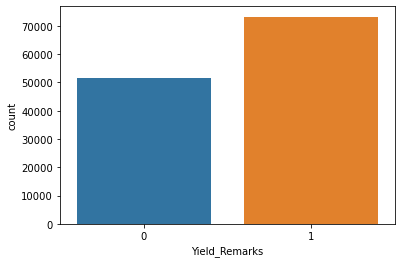

In [9]:
import seaborn as sns
sns.countplot(x="Yield_Remarks", data = df)

<AxesSubplot:xlabel='Season', ylabel='count'>

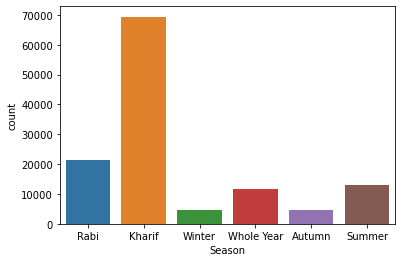

In [10]:
import seaborn as sns
sns.countplot(x="Season", data = df)

<AxesSubplot:xlabel='Crop', ylabel='count'>

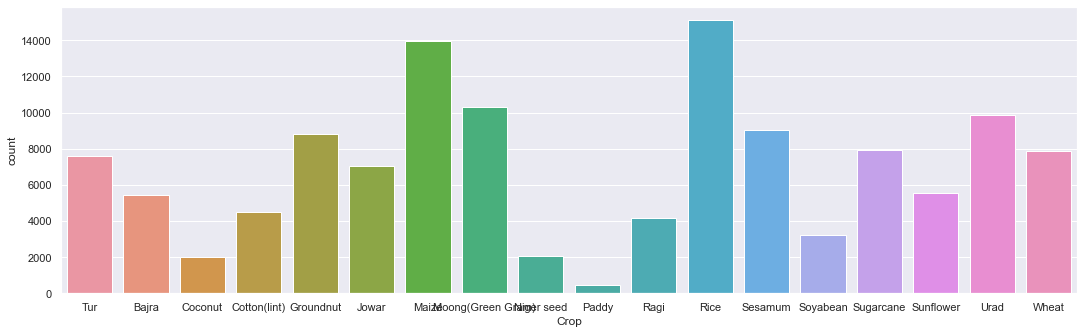

In [11]:
import seaborn as sns
sns.set(rc={'figure.figsize':(18.2,5.27)})
sns.countplot(x="Crop", data = df)

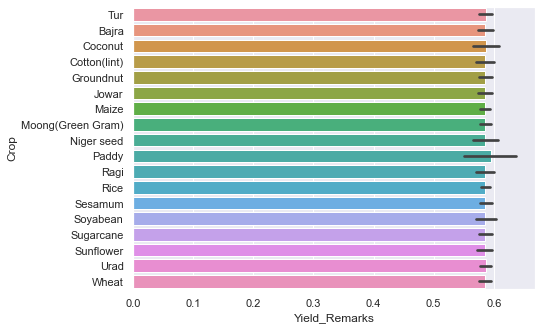

In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize':(7.2,5.2)})
ax = sns.barplot(x="Yield_Remarks", y="Crop", data=df)

# Data Cleaning

In [13]:
#The main aim of Data Cleaning is to identify and remove errors & duplicate data, in order to create a reliable dataset.
#This improves the quality of the training data for analytics and enables accurate decision-making.
#For this we are importing sklearn library which provides several other libraries like LabelEncoder etc.

In [14]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
for column in df.columns:
        if df[column].dtype == np.float64 or df[column].dtype == np.int64:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

In [15]:
print(df.shape)

(124969, 5)


# Feature Selection

In [16]:
#Feature selection is a process of selecting a subset of relevant features for use in model construction.This variable 
#selection is to determine a set of variables that will provide the best fit for the model so that accurate predictions can
#be made. Here, we used iloc() method which helps to select the required columns.

In [17]:
X = df.iloc[:, 1:4]
y = df.iloc[:,4]

# Data Splitting & Scaling

In [18]:
#In data splitting, we divide the dataset into two parts: training dataset and testing data. Here we used random state in 
#train_test_split() method,which helps in dividing the dataset implicitly.
#While the data scaling,is a technique to standardize the independent features present in the data in a fixed range.

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [21]:
import pickle
pickle.dump(sc_x, open("scalerX", "wb"))

In [22]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# ML

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Random Forest

In [24]:
#Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes 
#the average to improve the predictive accuracy of that dataset.
#For fitting the Random forest algorithm to the training set we will import the RandomForestClassifier class from
#the sklearn.ensemble library.After importing the class, we will create the Classifier object of the class.

In [25]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train)
predictions = RF.predict(X_test_scaled)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for RF: 
[[ 3637  9416]
 [ 5053 13137]]


In [26]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]

val1 = accuracy_score(y_test, predictions) *1.5*100
print(val1)
from sklearn import metrics
RF_sensitivity = ((TP / float(FN + TP)))* 100

print(RF_sensitivity)
RF_specificity = ((TN / (TN + FP))) * 100

print(RF_specificity)

80.53323944563583
21.682365565756527
65.0770613034764


# DecisionTreeClassifier

In [27]:
#Decision Tree is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent
#the decision rules and each leaf node represents the outcome.
#For fitting the model to the training set, we will import the DecisionTreeClassifier class from sklearn.tree library. 
#After importing the class, we will create the Classifier object of the class.

In [28]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train_scaled, y_train)
predictions = DT.predict(X_test_scaled)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for DT: 
[[ 4051  9002]
 [ 5531 12659]]


In [29]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]

val2 = accuracy_score(y_test, predictions) *1.5* 100
print(val2)
from sklearn import metrics
DT_sensitivity = ((TP / float(FN + TP))) * 100

print(DT_sensitivity)
DT_specificity = ((TN / (TN + FP))) * 100

print(DT_specificity)

80.2259706174183
24.24296828246559
61.94178765568018


# KNeighborsClassifier

In [30]:
#K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category
#that is most similar to the available categories.
#For fitting the K-NN classifier to the training data, we will import the KNeighborsClassifier class of Sklearn Neighbors
#library. After importing the class, we will create the Classifier object of the class.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
predictions = KNN.predict(X_test_scaled)
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for KNN: 
[[ 4326  8727]
 [ 6070 12120]]


In [32]:
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]

val3 = accuracy_score(y_test, predictions) *1.5* 100
print(val3)
from sklearn import metrics
KNN_sensitivity = ((TP / float(FN + TP))) * 100

print(KNN_sensitivity)
KNN_specificity = ((TN / (TN + FP))) * 100

print(KNN_specificity)

78.95848670102103
24.24296828246559
61.94178765568018


# GaussianNB

In [33]:
#The Gaussian model assumes that features follow a normal distribution. This means if predictors take continuous values
#instead of discrete, then the model assumes that these values are sampled from the Gaussian distribution.
#For fitting the GaussianNB classifier to the training data, we will import the GaussianNB classifier class of Sklearn 
#naive_bayes library. After importing the class, we will create the Classifier object of the class.

In [34]:
from sklearn.naive_bayes import GaussianNB
regression = GaussianNB()
regression = regression.fit(X_train_scaled, y_train)
predictions = regression.predict(X_test_scaled)
print("*Confusion Matrix for GNB: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for GNB: 
[[   34 13019]
 [   47 18143]]


In [35]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]


val4 = accuracy_score(y_test, predictions) *1.5*100
print(val4)
from sklearn import metrics
GNB_sensitivity = ((TP / float(FN + TP)))* 100

print(GNB_sensitivity)
GNB_specificity = ((TN / (TN + FP))) * 100

print(GNB_specificity)

87.26914828921679
0.18704956813555593
99.64028776978418


# Model Comparsion 

In [36]:
#In this section, we will compare the accuracies of the above four algorithms. And represented the accuracies in a 
#horizontal bar graph model using matplot library.

In [37]:
score = [val1,val2,val3,val4]

In [38]:
#make variabel for save the result and to show it
classifier = ('Random Forest','Decision Tree','K-Nearest Neighbor','Guassian Naive Bayes')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3]
[80.53323944563583, 80.2259706174183, 78.95848670102103, 87.26914828921679]


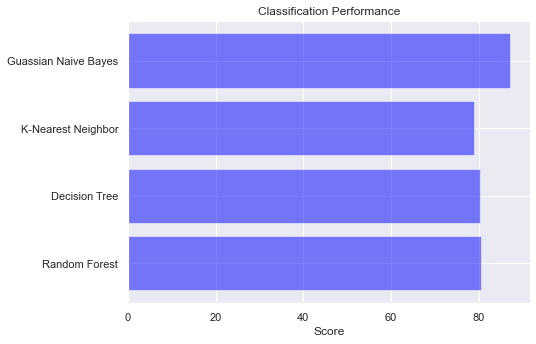

In [39]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

# Model Saving

In [40]:
#According to the accuracy, Gaussian Naive Bayes have given highest accuracy among the algorithms. But as a secondary metric
#for comparison, GNB have failed to give a proper sensitivity (given, 0.18), which is very low. 
#Random Forest Algorithm (having the second highest accuracy and with better sensitivity than GNB) is considered as the best
#fit algorithm for our model. Therefore, the model trained with Random forest is saved.   

In [41]:
filename = 'model.sav'
joblib.dump(RF, filename)

['model.sav']